Reference: https://www.kaggle.com/joshuajhchoi/titanic-tutorial-for-beginners-2020

# Part 1: 데이터 준비 및 모듈 임포트

In [2]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Brown, Miss. Amelia ""Mildred""",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Part 2: 파일 병합

In [10]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔 둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [11]:
print(ntrain, ntest)

891 418


In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Part 3: 파일 탐색

<AxesSubplot:>

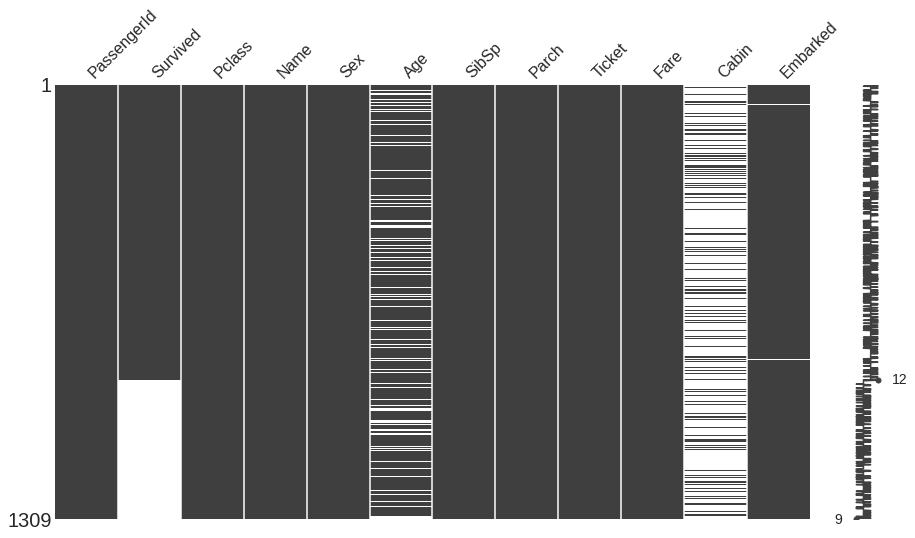

In [17]:
missingno.matrix(data, figsize = (15,8))

위 도표는 빈 값을 직관적으로 볼 수 있게 합니다. 아래 쪽 Survived가 비어 있는데 이 것은 테스트에 우리가 답으로 예측해야 하는 부분이라서 그렇 습니다.

In [18]:
data.isnull().sum() #비어 있는 값들을 체크해 본다.

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [19]:
data.Age.isnull().any()

True

In [20]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Feature 항목

- 범주형 항목 (Categorical Features): Sex, Embarked, Cabin, Name
- Ordinal Variable : PClass, Cabin <br>
순위 변수는 범주 형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능하다는 것입니다.<br>
데이터 셋에서 순위 항목 : PClass 이며 우리는 Cabin을 이 범주로 변환해서 사용해야 할 것 같습니다.<br>
- 연속형 항목 (Continuous Features): Age, SipSp, Parch, Fare

# Part 4: 데이터 탐구 (Exploratory Data Analysis, EDA)

## Correlations

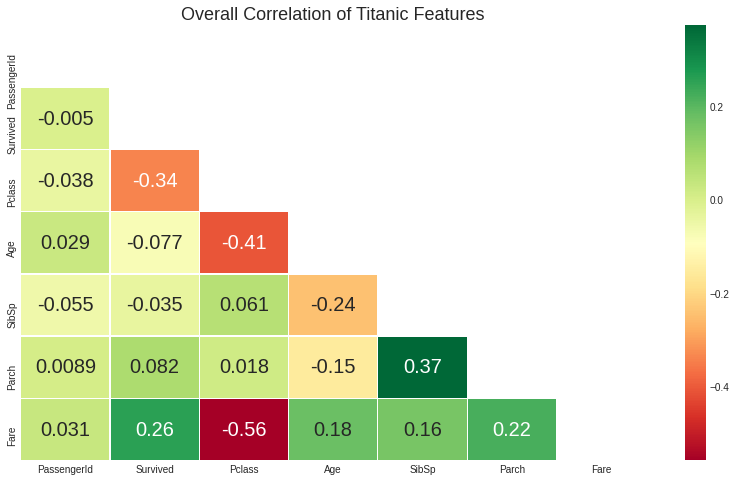

In [22]:
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

## Survived

0    549
1    342
Name: Survived, dtype: int64


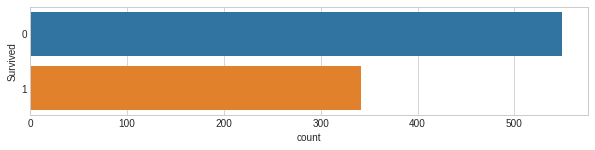

In [23]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

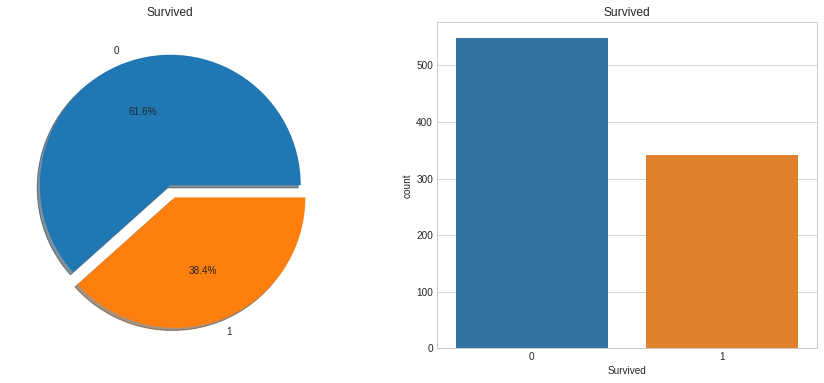

In [24]:
f,ax=plt.subplots(1, 2, figsize=(15, 6))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

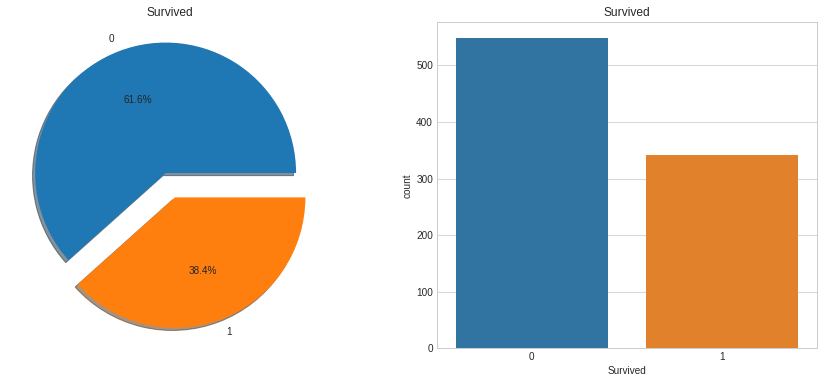

In [26]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')

### Pclass vs Survived

In [27]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [28]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


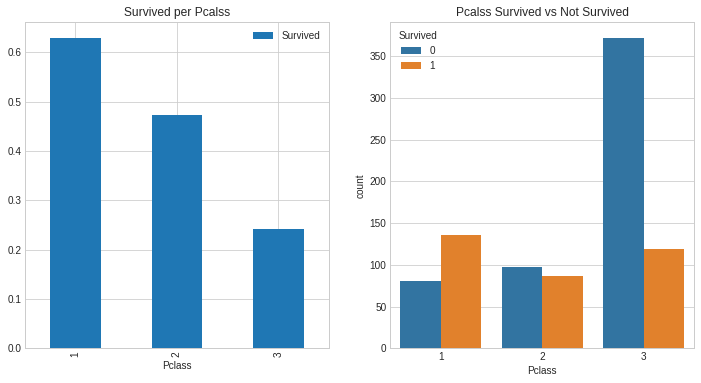

In [29]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')
plt.show()

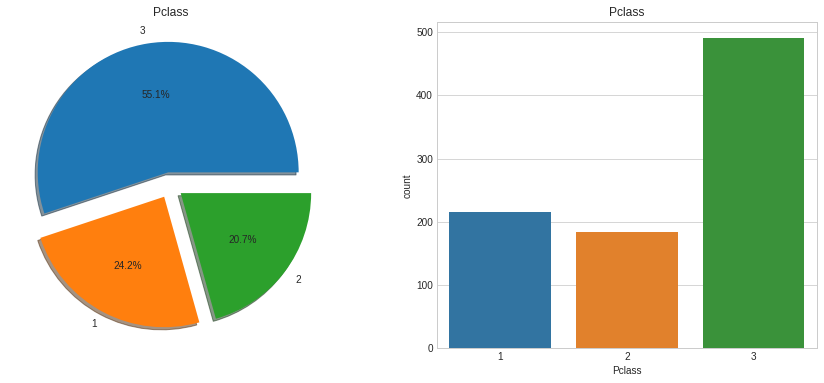

In [30]:
piecount("Pclass")

## Name

In [31]:
data.Name.value_counts()

Connolly, Miss. Kate                     2
Kelly, Mr. James                         2
Lane, Mr. Patrick                        1
Mannion, Miss. Margareth                 1
Dimic, Mr. Jovan                         1
                                        ..
Gibson, Miss. Dorothy Winifred           1
Oxenham, Mr. Percy Thomas                1
Baclini, Mrs. Solomon (Latifa Qurban)    1
Hiltunen, Miss. Marta                    1
McCarthy, Mr. Timothy J                  1
Name: Name, Length: 1307, dtype: int64

In [32]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [33]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Jonkheer      1
Mme           1
Lady          1
Don           1
Dona          1
Countess      1
Capt          1
Sir           1
Name: Initial, dtype: int64

In [34]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [35]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

- test 에 있는 Dona의 나이를 보고 어디에 넣을지 보겠습니다.
- Ms. 는 현대처럼 Miss + Mrs를 합친 말이 아니라 당시에는 귀족미망인을 의미하는 것이 었습니다. Mlle나 Mme등도 마드모아젤과 마담의 줄인말일 경우일 것입니다. 귀족 여성들로 보아야겠죠

In [36]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [37]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

In [38]:
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


- 나이로 추측해서 Mrs.로 넣습니다.
- 결측치를 처리하는 방법은 많으나 이렇게 하나일 경우에는 가장 적절한 추측을 사용하여 넣는 것도 괜찮습니다.

In [39]:
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

In [40]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [42]:
temp['NumName'] = temp['LastName'].factorize()[0]

In [43]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

In [44]:
temp.loc[temp['LastName'] == 'Ali']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S,Mr,Ali,182
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S,Mr,Ali,182


## Sex

In [45]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


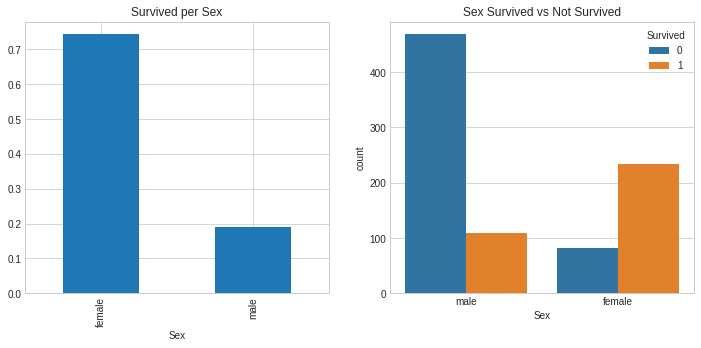

In [47]:
def bag(col, target, title, title1):
    f,ax=plt.subplots(1,2,figsize=(12,5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

In [48]:
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

## Age

In [49]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


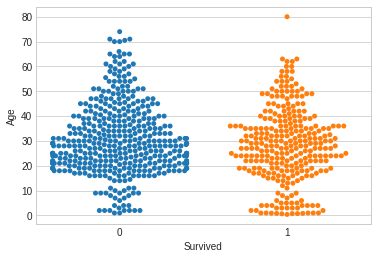

In [50]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

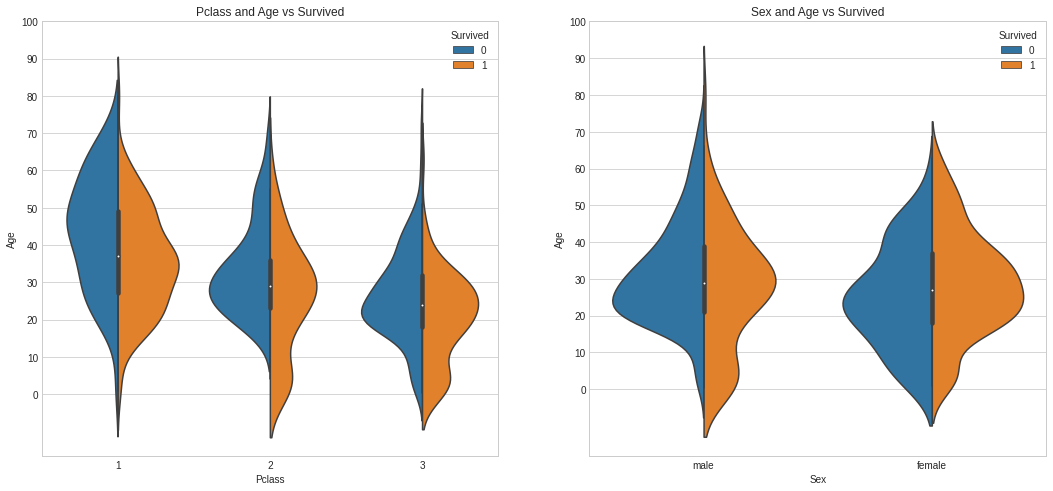

In [51]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex","Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

우선 age의 빈칸 부터 해결 합니다.

앞에서 살펴본 것처럼 Age 항목에는 177 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 수명을 지정할 수 있습니다.

그러나 문제는 평균 연령이 29 세를 4세 아이에게 할당 할 수 없습니다. 승객이 어떤 연령대에 있는지 알 수있는 방법이 있을까요? 이름에서 힌트를 찾아 봅니다

그리고 Initial 별 평균 연령을 보고 Age에 적용 시키는 것이 좋을 것 같습니다.

In [52]:
temp.groupby('Initial').agg({'Age': ['mean', 'count']}) #이니셜 별 평균 연령 체크

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [53]:
temp = temp.reset_index(drop=True)

temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


In [54]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 
                         'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr',
                         'Mrs', 'Ms', 'Rev', 'Sir'], 
                        ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected',
                         'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 
                         'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)

In [55]:
temp['Initial'].value_counts()

Mr            759
Miss          260
Mrs           198
Kids           61
Respected      14
Sacrificed      9
Nobles          8
Name: Initial, dtype: int64

In [56]:
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], 
                        [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [57]:
temp['Initial'].value_counts()

2    759
4    321
5    198
3     14
1      9
6      8
Name: Initial, dtype: int64

왜 Kids와 Miss에게 같은 4라는 번호를 부여한 것일까?

In [58]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)

In [59]:
temp['Age_Range'].value_counts()

(30.0, 32.252]    225
(16.0, 21.0]      156
(33.0, 39.0]      145
(0.169, 16.0]     142
(26.0, 30.0]      137
(39.0, 48.0]      127
(21.0, 23.0]      120
(48.0, 80.0]      119
(23.0, 26.0]      113
(32.252, 33.0]     25
Name: Age_Range, dtype: int64

In [60]:
temp['Agroup'] = 0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

In [62]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36


In [65]:
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1      # 남자
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2    # 여자
temp.loc[(temp['Age'] < 1), 'Sex'] = 3            # 1세 미만 아기

In [66]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36


In [67]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

## Family or Alone?

In [68]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1

In [70]:
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

In [71]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1


In [72]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Initial      1309 non-null   int64   
 13  LastName     1309 non-null   object  
 14  NumName      1309 non-null   int64   
 15  Age_Range    1309 non-null   category
 16  Agroup       1309 non-null   int64   
 17  Alone        790 non-null    float64 
 18  Family       1309 non-null  

<AxesSubplot:>

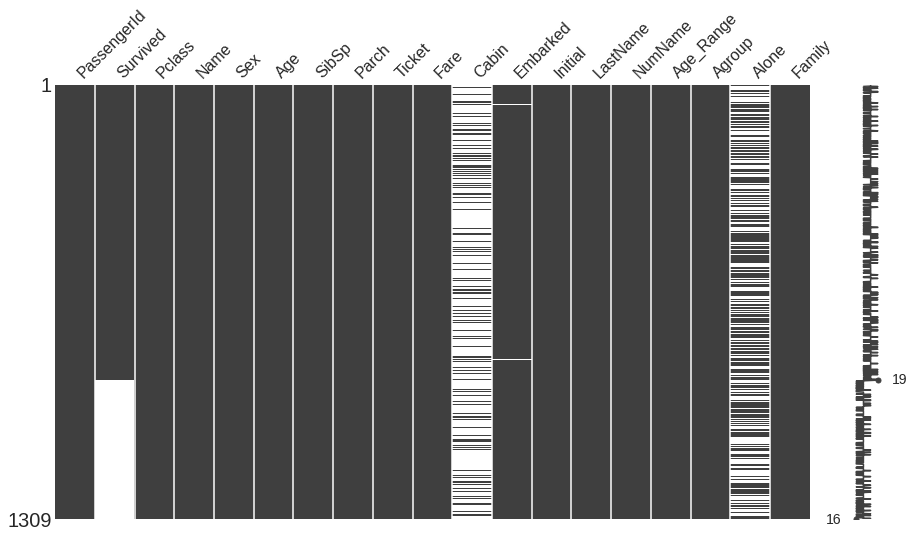

In [74]:
missingno.matrix(temp, figsize = (15,8))

In [75]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

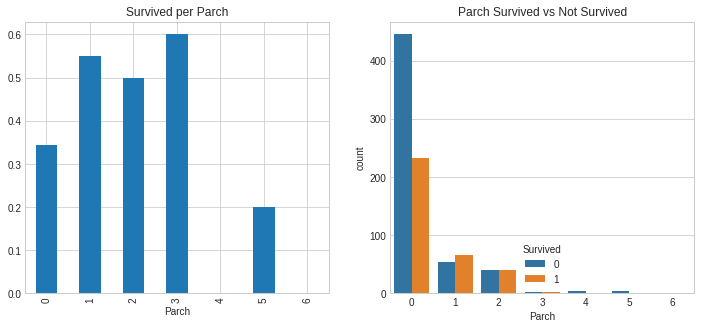

In [76]:
bag('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Not Survived')

In [77]:
pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')

크로스 탭은 다시 식구 많은 쪽은 Pclass3에 있음을 보여줍니다.

여기에서도 결과는 매우 비슷합니다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라 갈수록 줄어 듭니다.

생존 가능성은 배에 1-3 명의 부모가있는 누군가에게 좋습니다. 혼자 또한 생존 가능성이 낮은 것으로 판명되고 가족이 4 명이상 있으면 생존 가능성이 줄어 듭니다. 이는 소수의 가족들이 있는 귀족층이 생존하고, 혼자가 많은 젊은 이들은 양보를 할 수 밖에 없고, 가족이 많은 사람들(특히 귀족이 아닌 3등칸 사람들)은 전원이 타지 못 하면 어느 누구도 탈 수가 없는 비극적인 당시 상황을 보여 줍니다.

## Ticket

In [81]:
temp.Ticket.isnull().any()

False

In [82]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)')

In [84]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')

In [85]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN


In [86]:
temp['NumTicket'] = temp['Initick'].factorize()[0]

In [87]:
temp.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,...,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,...,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,...,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,...,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,...,Q,2,Moran,5,"(30.0, 32.252]",33,1.0,1,NaN,-1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,...,S,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1,NaN,-1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,...,S,4,Palsson,7,"(0.169, 16.0]",2,NaN,5,NaN,-1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,...,S,5,Johnson,8,"(26.0, 30.0]",28,NaN,3,NaN,-1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,...,C,5,Nasser,9,"(0.169, 16.0]",13,NaN,2,NaN,-1


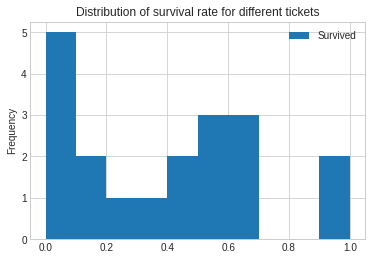

In [88]:
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')
plt.title('Distribution of survival rate for different tickets');

### Fare 분석

In [89]:
print('Highest Fare was:', temp['Fare'].max())
print('Lowest Fare was:', temp['Fare'].min())
print('Average Fare was:', temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.29547928134557


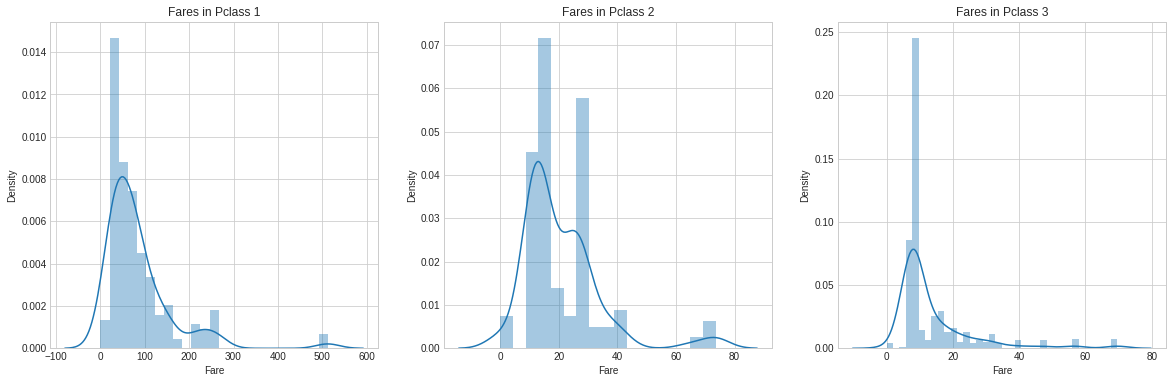

In [90]:
f,ax=plt.subplots(1, 3, figsize=(20, 6))
sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass'] == 2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass'] == 3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [91]:
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 10)
groupmean('Fare_Range', 'Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.928717
"(7.55, 7.854]",7.768490
"(7.854, 8.05]",7.963669
"(8.05, 10.5]",9.521367
"(10.5, 14.454]",12.940231
"(14.454, 21.679]",17.386408
"(21.679, 27.0]",25.487501
"(27.0, 39.688]",32.282186
"(39.688, 77.958]",59.444572


- qcut을 활용하면 원하는 조각으로 데이터를 나누어 줍니다.
- cut와 qcut의 차이

In [93]:
temp['Fare_Range'].value_counts()

(7.854, 8.05]        106
(-0.001, 7.55]        92
(27.0, 39.688]        91
(39.688, 77.958]      89
(21.679, 27.0]        89
(14.454, 21.679]      88
(77.958, 512.329]     87
(7.55, 7.854]         87
(10.5, 14.454]        84
(8.05, 10.5]          78
Name: Fare_Range, dtype: int64

In [94]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4


## Cabin 분석

In [95]:
temp.Cabin.isnull().sum()

1014

- 빈칸이 무척 많습니다.
- Cabin에 비어 있는 것이 많아 이를 다른 분류로 일단 잡고 기존 것은 이니셜로 분류합니다.
- 빈 것은 X로 구분하려는데 이 또한 1,2,3 Pclass와 연동될 것 같으니 비어있고 1등급은 X, 2등급은 Y, 3등급은 Z로 하겠습니다.

In [96]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'
    
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,C
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,Z


In [97]:
temp['Inicab'] = temp['Inicab'].factorize()[0]

In [98]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,0


## Embarked 분석

In [99]:
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

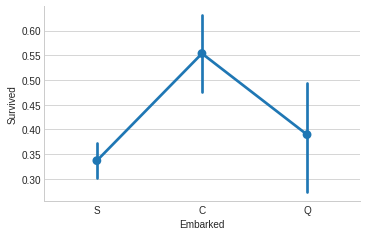

In [100]:
sns.factorplot('Embarked', 'Survived', data=temp)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

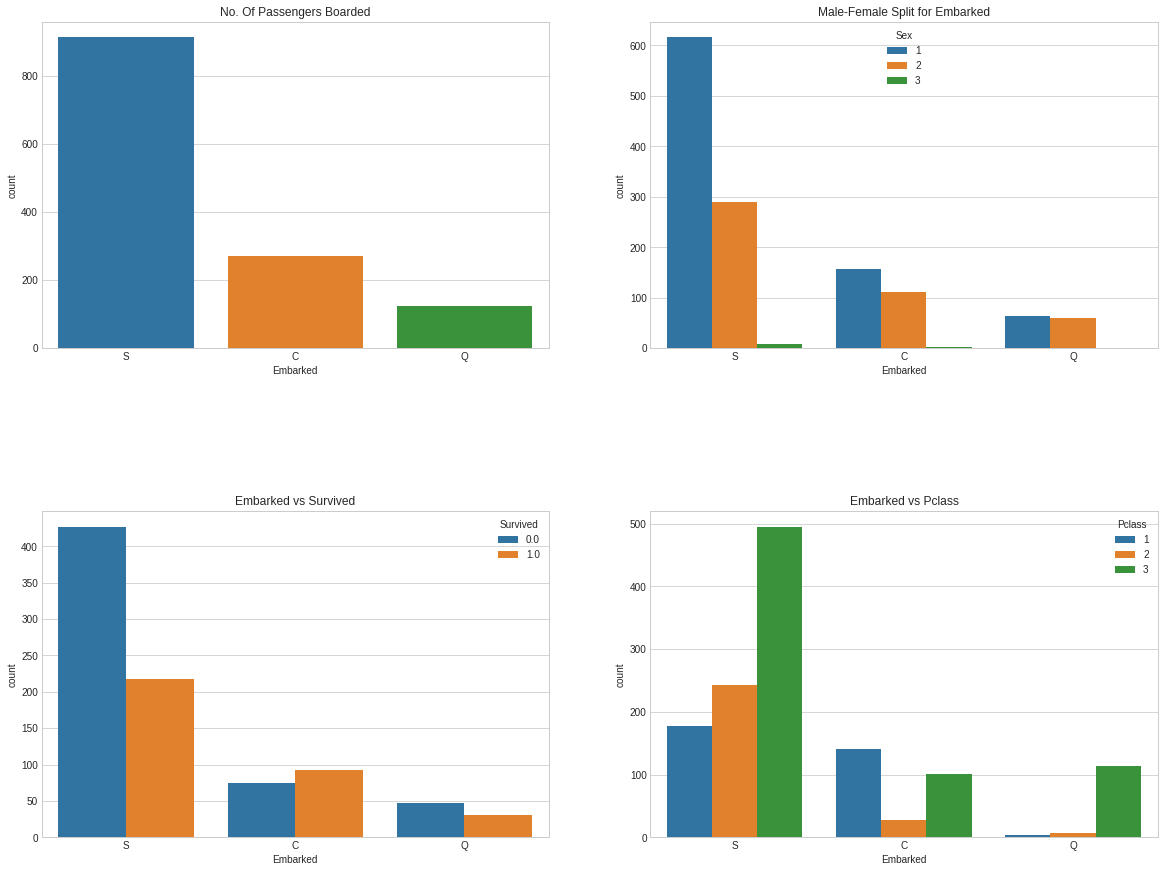

In [101]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- 두 개의 null값

In [102]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


두 사람의 티켓번호가 같다.

In [103]:
temp.loc[(temp.Ticket == '113572')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


In [104]:
temp.sort_values(['Ticket'], ascending = True)[55:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",1,65.000000,0,1,113509,61.9792,...,51,"(48.0, 80.0]",60,NaN,2,NaN,-1,"(39.688, 77.958]",8,8
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",1,32.252151,0,0,113510,35.0000,...,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(27.0, 39.688]",7,1
252,253,0.0,1,"Stead, Mr. William Thomas",1,62.000000,0,0,113514,26.5500,...,217,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.000000,0,0,113572,80.0000,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
61,62,1.0,1,"Icard, Miss. Amelie",2,38.000000,0,0,113572,80.0000,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
802,803,1.0,1,"Carter, Master. William Thornton II",1,11.000000,1,2,113760,120.0000,...,215,"(0.169, 16.0]",13,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
390,391,1.0,1,"Carter, Mr. William Ernest",1,36.000000,1,2,113760,120.0000,...,215,"(33.0, 39.0]",36,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
435,436,1.0,1,"Carter, Miss. Lucile Polk",2,14.000000,1,2,113760,120.0000,...,215,"(0.169, 16.0]",13,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",2,36.000000,1,2,113760,120.0000,...,215,"(33.0, 39.0]",36,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",1,32.252151,0,0,113767,50.0000,...,162,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(39.688, 77.958]",7,6


앞 뒤로 모두 S이고 Pclass도 모두 1인 것으로 봐서 S일 가능성이 큽니다.

In [105]:
temp.loc[(temp.Embarked.isnull()), 'Embarked'] = 'S'

In [106]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [107]:
temp['Embarked'] = temp['Embarked'].factorize()[0]

# Part 5: Feature Engineering

위에 추가 항목을 몇 개 만들어 보았습니다.

그래도 몇 개 더 만들어 볼까요?

5개 정도 만들어 봅니다.

- Priority - Nobles, Women in Pclass 1 & 2, Babies under 1, Kids under 17 in Pclass 1 & 2, higher fare, Women in Pclass 3 and so on

- FH - Female Higher Survival Group
- MH - Male Higher Survival Group
- FL - Female Lower Surival Group
- ML - Male Lower Survival Group

Priority - (1) Nobles (2) Women in Pclass 1 (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2 (5) Women in Pclass 2 (6) Higher Fare

In [111]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [112]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [113]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [115]:
survpct('Age').head(10)

Age
0.17         NaN
0.33         NaN
0.42    1.000000
0.67    1.000000
0.75    1.000000
0.83    1.000000
0.92    1.000000
1.00    0.714286
2.00    0.300000
3.00    0.833333
Name: Survived, dtype: float64

In [116]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [117]:
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [118]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [119]:
temp.Priority.value_counts()

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64

In [120]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [121]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

In [122]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [123]:
temp.FH.value_counts()

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64

In [124]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

In [125]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [126]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

In [127]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

# Part 6: 마지막 항목 결정

In [128]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

## Label Encoding / One-Hot Encoding

In [129]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [130]:
dfl = pd.DataFrame()

In [131]:
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13']
dfl[good_columns] = temp[good_columns]

In [132]:
dfh = dfl.copy()

In [133]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
                          
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,1,1,0,0,2
1,2,5,0,2,0,4,8,1,2,1,1,1,0
2,0,4,0,5,0,3,3,2,3,0,0,1,2
3,2,5,0,2,0,4,8,3,0,1,0,1,0
4,0,0,1,0,6,1,4,4,0,0,0,0,2


In [134]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,...,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


# Part 7: 머신러닝 모델 만들기

In [135]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [136]:
X_test = test
X_train = train

In [137]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

[20:26:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [139]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.833333,0.865169,0.752809,0.887640,0.887640,0.831461,0.865169,0.764045,0.853933,0.808989,0.835019
SVC,0.833333,0.887640,0.797753,0.876404,0.865169,0.797753,0.808989,0.764045,0.865169,0.820225,0.831648
Random Forest,0.777778,0.876404,0.752809,0.887640,0.887640,0.842697,0.831461,0.775281,0.853933,0.820225,0.830587
Gradient Boosting,0.811111,0.831461,0.775281,0.876404,0.865169,0.820225,0.842697,0.797753,0.831461,0.842697,0.829426
Extra Trees,0.788889,0.853933,0.741573,0.887640,0.876404,0.842697,0.842697,0.764045,0.865169,0.820225,0.828327
Logistic Regression,0.800000,0.853933,0.797753,0.865169,0.876404,0.808989,0.820225,0.786517,0.853933,0.820225,0.828315
AdaBoost,0.822222,0.808989,0.786517,0.865169,0.842697,0.808989,0.808989,0.797753,0.808989,0.831461,0.818177
XGBoost,0.755556,0.831461,0.719101,0.887640,0.853933,0.842697,0.820225,0.775281,0.853933,0.831461,0.817129
K Nearest Neighbour,0.800000,0.797753,0.786517,0.797753,0.842697,0.786517,0.786517,0.741573,0.842697,0.831461,0.801348
Gaussian Process,0.522222,0.696629,0.539326,0.494382,0.573034,0.528090,0.426966,0.561798,0.550562,0.606742,0.549975


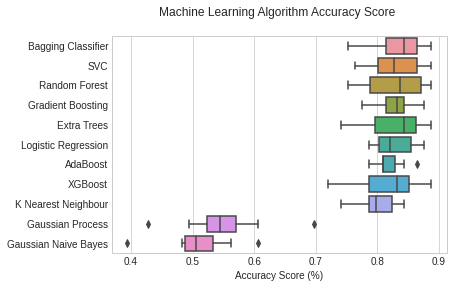

In [140]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

In [141]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

In [142]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

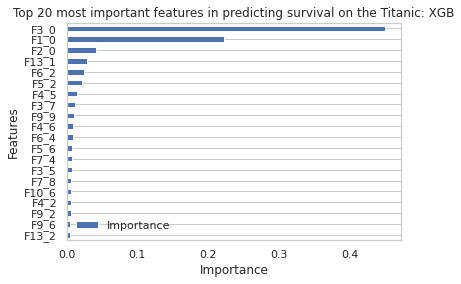

In [143]:
# 그래프 제목
title = 'Top 20 most important features in predicting survival on the Titanic: XGB'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

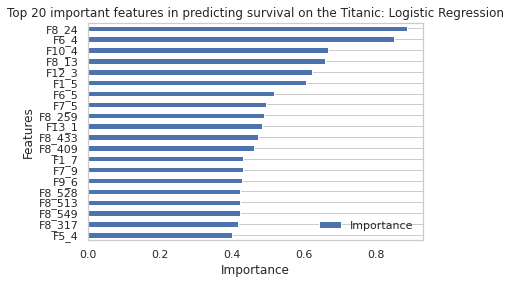

In [144]:
# 중요도를 데이터프레임에 넣습니다. Logistic regression에서는 중요도보다 coefficients를 사용합니다. 
# 아래는 Features라는 열에 트레인의 열들의 이름을 리스트로 만들어서 넣고 Importance에는 Logistic regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령입니다.(즉 가로를 세로로)
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: Logistic Regression'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [145]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# Part 8: 중요도에 따라 모델 재 설정

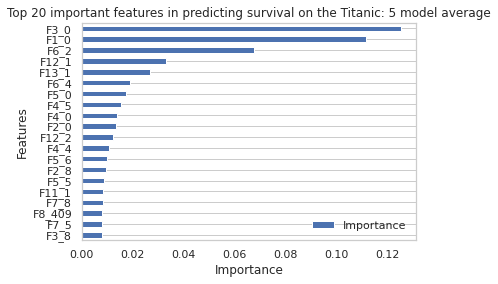

In [147]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: 5 model average'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [148]:
importance1 = importance[-381:]

importance1[371:381]

,Importance
Features,
F2_0,0.013307
F4_0,0.013952
F4_5,0.015242
F5_0,0.017558
F6_4,0.019107
F13_1,0.026960
F12_1,0.033173
F6_2,0.067747
F1_0,0.111300


In [149]:
# 영양가 있는 380개만 넣기
mylist = list(importance1.index)

In [150]:
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i]= test[i]
    
train1.head()

,F8_269,F8_564,F8_611,F8_175,F8_90,F8_92,F8_386,F8_321,F8_531,F8_624,...,F2_0,F4_0,F4_5,F5_0,F6_4,F13_1,F12_1,F6_2,F1_0,F3_0
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,0


In [151]:
train = train1
test = test1

# 모델의 변수를 다시 정의하고
X_train = train
X_test = test

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

# 학습 및 교차 검증
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores2[model_names[ind]] = acc

[20:33:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

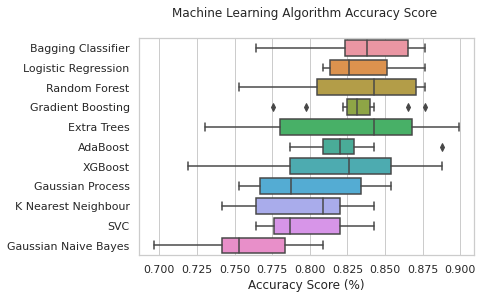

In [153]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

# Part 9: 하이퍼 파라미터 튜닝

### SVC
- Scikit-Learn에서는 3가지 모형 최적화 도구를 지원하는데 validation_curve/ GridSearchCV/ ParameterGrid이다
- fit 메소드를 호출하면 grid search가 자동으로 여러개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾는다.

- bestscore는 최고 점수이고 best estimator는 최고 점수를 낸 파라미터를 가진 모형

- c값과 gamma값은 10의 배수로 일반적으로 한다.
- 감마 매개 변수는 단일 학습 예제의 영향이 도달하는 정도를 정의하며 낮은 값은 'far'를, 높은 값은 'close'를 나타냅니다. 감마 매개 변수는 서포트 벡터로 모델에 의해 선택된 샘플의 영향 반경의 역으로 볼 수 있습니다.
- C 매개 변수는 의사 결정 표면의 단순성에 대한 훈련 예제의 오 분류를 제거합니다. C가 낮을수록 결정 표면이 매끄럽고 높은 C는 모델이 더 많은 샘플을 서포트 벡터로 자유롭게 선택할 수 있도록하여 모든 학습 예제를 올바르게 분류하는 것을 목표로합니다.
- Verbose는 불리안 값으로 True로 넣으면 꼬치 꼬치 다 알려주는데, 대신 시간이 좀 더 오래 걸립니다.
- cv =5는 5 fold로 교차 검증한다는 뜻입니다.

In [154]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.8372481325717155
{'C': 5, 'gamma': 0.001}


### Gradient Boosting Classifier
- learning_rate는 각 트리의 기여를 줄이는 역할을 합니다.
- n_estimator는 각 경우의 트리 숫자입니다.

In [155]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.8395016006528152
{'learning_rate': 0.5, 'n_estimators': 100}


### Logistic Regression
- Penalty - L1 을 사용하는 회귀 모델을 Lasso Regression이라고하고 L2를 사용하는 모델을 Ridge Regression이라고합니다. 이 둘의 주요 차이점은 페널티입니다. 릿지 회귀는 손실 함수에 페널티 항으로 계수의 "제곱 크기"를 추가합니다. L2-norm이 오차를 제곱하기 때문에 (오류> 1 인 경우 로트가 증가 함) 모델은 L1-norm보다 훨씬 큰 오차 (e vs e ^ 2)를 보게되므로 훨씬 더 민감합니다. 따라서 오류를 최소화하기 위해 모델을 조정해줍니다.
- C는 estimator 입니다. logspace 1차원 10개 배열로 0에서 4까지를 estimator로 놓은 것입니다.

In [156]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8283033080158184
{'C': 1.0, 'penalty': 'l2'}


### XGBoost Step 1.

In [157]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[21:16:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8294331805913
{'learning_rate': 0.1, 'n_estimators': 10}


### XGB Step 2.

In [158]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[21:18:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8361433682756889
{'max_depth': 7, 'min_child_weight': 5}


### XGB Step 3.

In [159]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[21:21:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8283095850856819
{'gamma': 0.0}


### XGB Step 4.

In [160]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[21:24:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8283095850856821
{'colsample_bytree': 0.85, 'subsample': 0.7}


### XGB Step 5.

In [161]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[21:30:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8283095850856819
{'reg_alpha': 1e-05}


### Gaussian Process

In [162]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.8002259745150964
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True}


### Adaboost

In [163]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.8372293013621241
{'learning_rate': 0.5, 'n_estimators': 200}


### KNN

In [164]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.8238277572029377
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


### Random Forest

In [165]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
0.8361308141359614
{'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 50}


### Extra Trees

In [166]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
0.8361182599962337
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


### Bagging Classifier

In [167]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
0.8417174063147324
{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}


# Part 10: 모델 재 트레이닝

In [168]:
# 튜닝 모델 시작
# sample을 split하는 것은 전체데이터 80%를 트레인셋에 20%는 테스트셋에 줌  
ran = RandomForestClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=1)

knn = KNeighborsClassifier(leaf_size=1, n_neighbors=4, weights='distance')

log = LogisticRegression(C=2.7825594022071245, penalty='l2')

xgb = XGBClassifier(learning_rate=0.1, n_estimators=10, max_depth=7, 
                                          min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1, reg_alpha=1e-05)

gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000)

svc = SVC(probability=True, gamma=0.001, C=5)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, random_state=1)

ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)

bag = BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=75, random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}

# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores3[model_names[ind]] = acc

[21:51:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:51:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:51:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:51:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

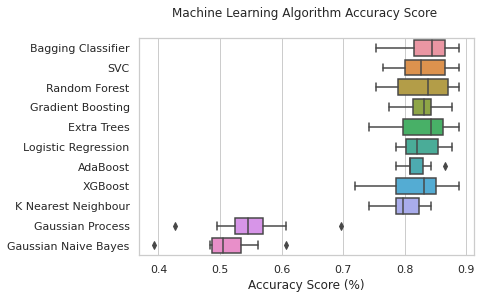

In [169]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)


result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

# Part 11: 마지막 보팅

In [170]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

[21:53:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [171]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

[21:55:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# Part 12: 마지막 모델 예측

In [172]:
# Final predictions
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission2.csv', header = True, index = False)

In [173]:
# Final predictions2
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission1.csv', header = True, index = False)

# Part 13: 제출

In [ ]:
# And we finally make a submission 그리고 제출 합니다.
# Please make sure you "commit" (It take a few minutes) / commit버턴을 누르시는 것을 잊지 마세요 (몇 분 걸립니다)
# And then you will see the submission file on the top right hand side at Data>Output>Kaggle/working / 그럼 우측 상단 데이터 아웃풋에서 제출용 결과물이 나올 것입니다.